In [1]:
import pandas as pd

import scanpy as sc
import scFates as scf

import palantir

import rpy2

In [2]:
# Load scRNA-seq fibroblast data set with, processed with UMAP embeddings
rna = sc.read_h5ad("../data/rna/scRNA_batch1_2.processed.fibroblasts.h5ad")

In [3]:
rna

AnnData object with n_obs × n_vars = 26727 × 17590
    obs: 'doublet_bh_pval', 'n_counts', 'sample_id', 'scrublet_score', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'percent_ribo', 'percent_hb', 'percent_top50', 'GEX_SID', 'ATAC_SID', 'GEX', 'ATAC', 'Sample', 'DOB', 'Gender', 'date', 'age_years', 'state', 'disease', 'site_taken_fine', 'site_taken_broad', 'sorted', 'Nancy_histologic_score', 'slide_look_other', 'whole_tissue_signature', 'scSeq', 'bulkSeq', 'annot_batch1_lr', 'annot_batch1_lr_prob', 'annot_batch2_lr', 'annot_batch2_lr_prob', 'leiden_bk_r0_1', 'leiden_bk_r0_3', 'leiden_bk_r0_5', 'is_doublet', 'leiden_bk_split1', 'leiden_bk_split2', 'leiden_bk_split3', 'annot1', 'leiden_bk_split4', 'annot_gut_lr', 'annot_gut_lr_prob', 'broad_annot1'
    var: 'gene_ids', 'mito', 'ribo', 'hb', 'n_counts', 'n_cells', 'cc', 'highly_variable', 'highly_variable_nbatches', 'hvg_full'
    uns: 'annot1_colors', 'leiden', 'neighbors', 'neighbors_bk', 'pca', 'umap'
    obsm: 'X_pca'

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


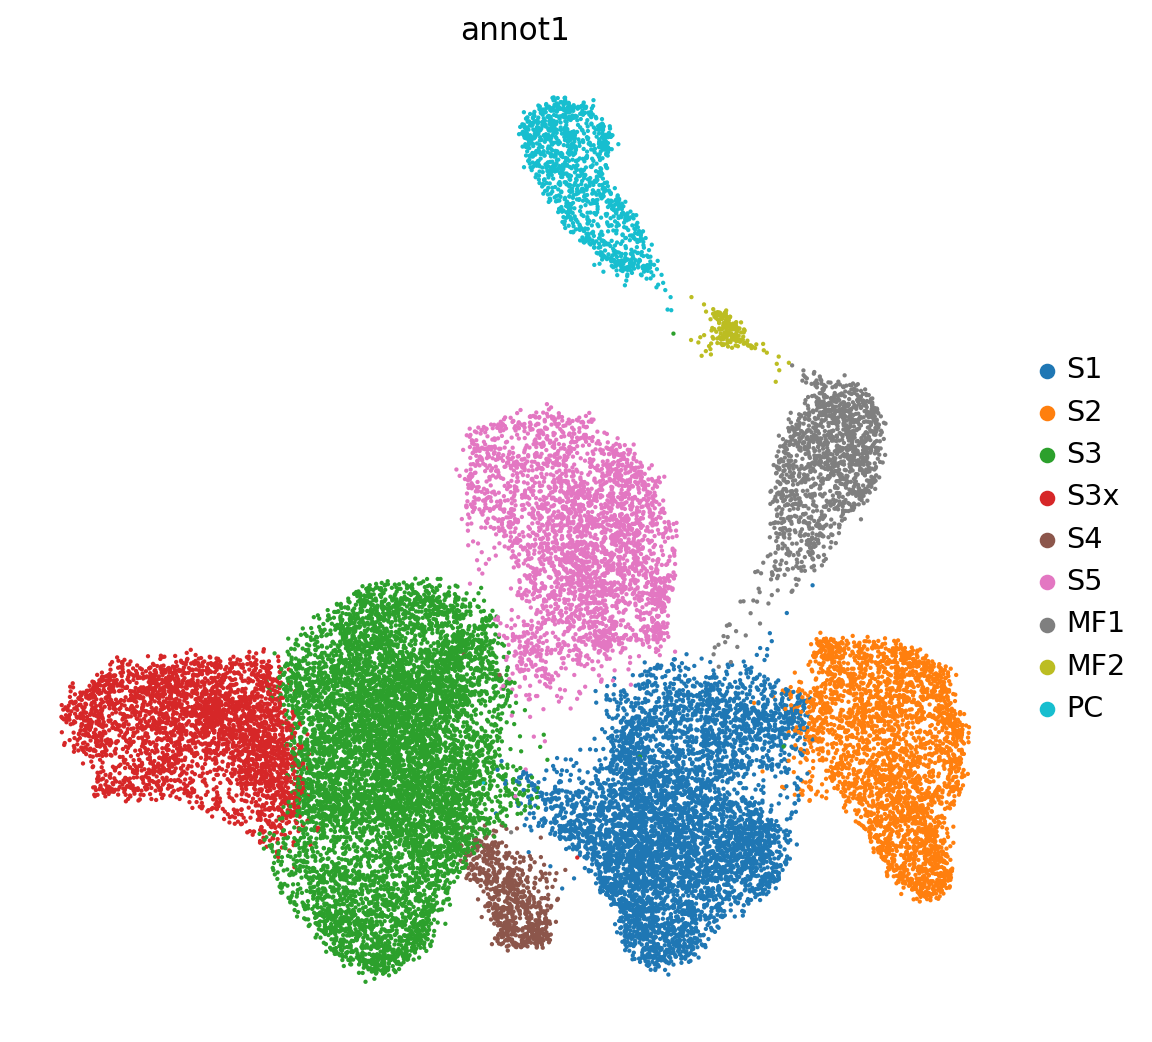

In [4]:
# Set up cell colors and check agreement of UMAP coordinates
sc.set_figure_params(dpi_save=300, figsize=(8, 8))

# without outline
sc.pl.umap(
    rna,
    color='annot1',
    palette='tab10',
    #palette=sc.plotting.palettes.vega_10_scanpy,  # color blind adjusted, vega10 same as tab10?
    frameon=False,
    size=15,  # point size
    #legend_loc='on data',
    #save='UMAP_ATAC_fibroblast_MF_PC.pdf'  # in ./figures
)

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


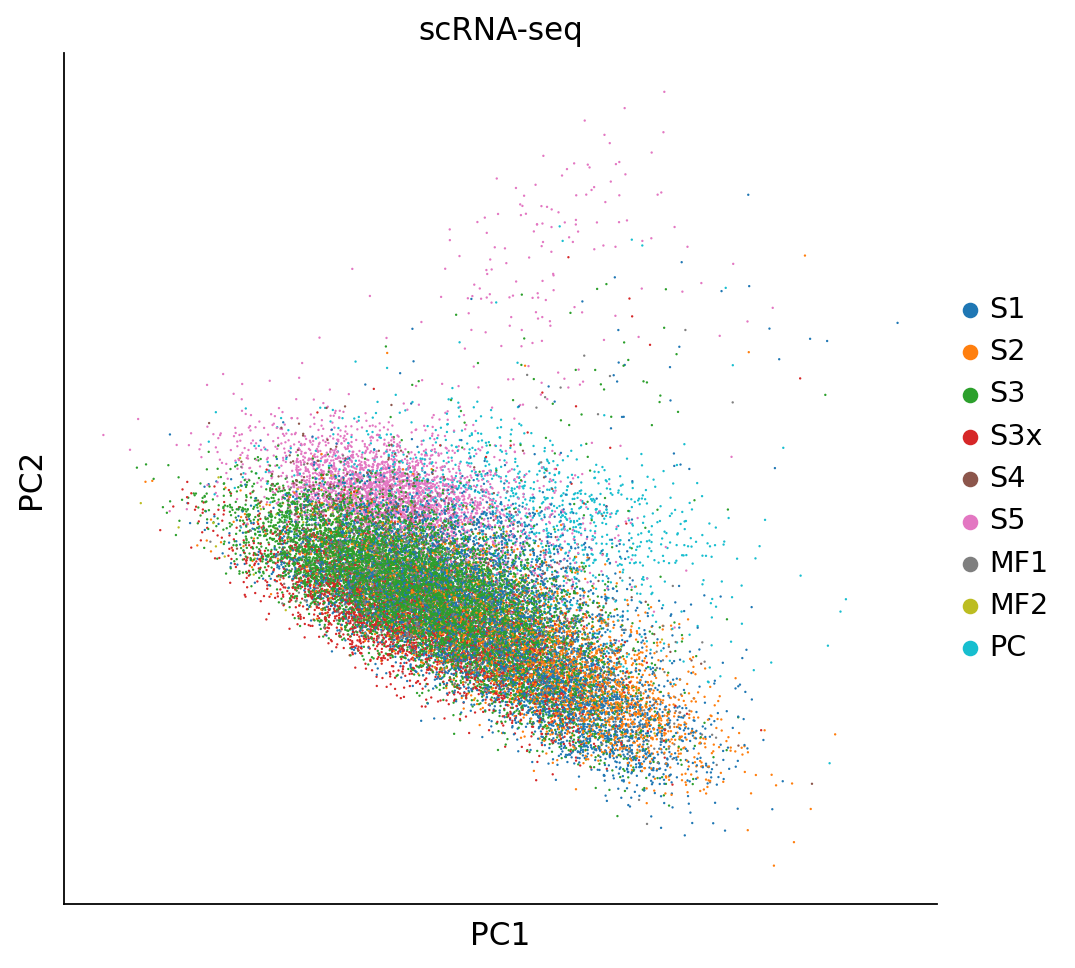

In [5]:
sc.set_figure_params(dpi_save=300, figsize=(7, 7.0))

sc.pl.embedding(rna, basis="pca", color="annot1", title="scRNA-seq")

In [6]:
# scFates graph on pca representation
scf.tl.tree(rna, method="ppt", Nodes=50, use_rep="pca",
            device="cpu", seed=1, ppt_lambda=100, ppt_sigma=0.025, ppt_nsteps=200)

inferring a principal tree --> parameters used 
    50 principal points, sigma = 0.025, lambda = 100, metric = euclidean
    fitting:  32%|███▏      | 64/200 [00:08<00:18,  7.40it/s]
    converged
    finished (0:00:08) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/simpleppt/ppt.py:267: RuntimeWarning: divide by zero encountered in log
  sigma / R.shape[0] * np.sum(R * np.log(R)),
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/simpleppt/ppt.py:267: RuntimeWarning: invalid value encountered in multiply
  sigma / R.shape[0] * np.sum(R * np.log(R)),


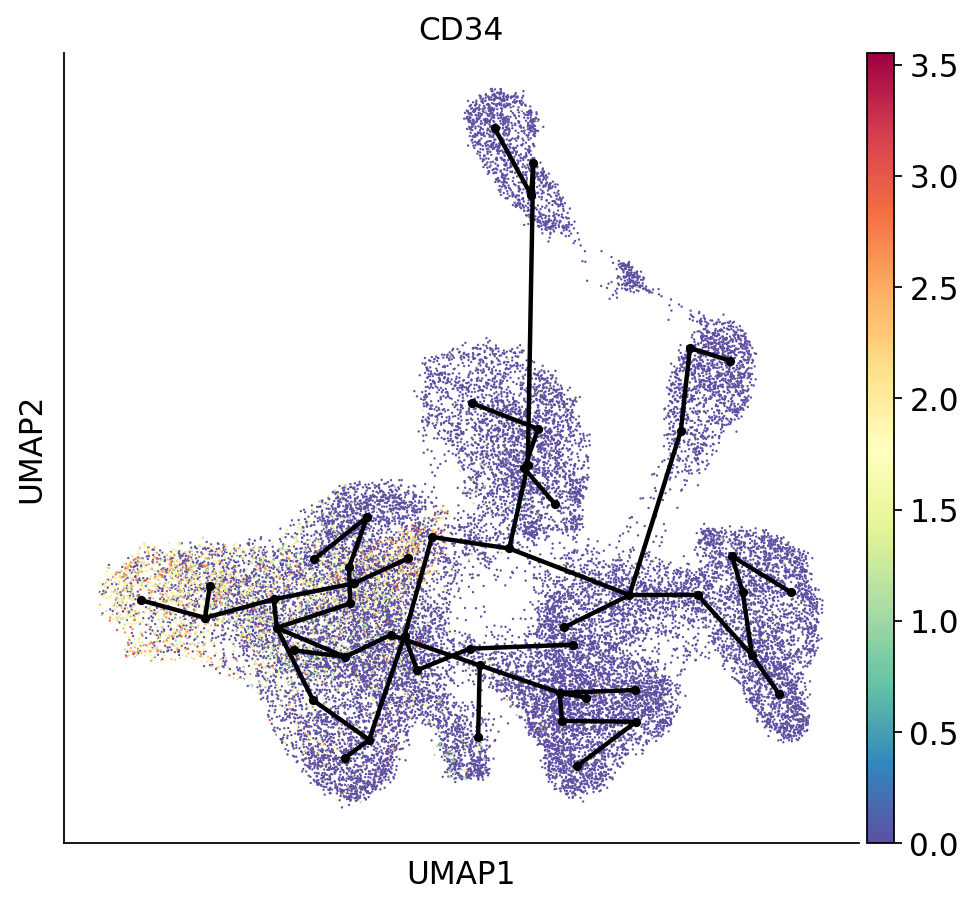

In [7]:
sc.set_figure_params(dpi_save=300, figsize=(7, 6.5))

scf.pl.graph(rna, color_cells="CD34", tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap", cmap="Spectral_r",
             save="_RNA_scFates_PCA_CD34.pdf")

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


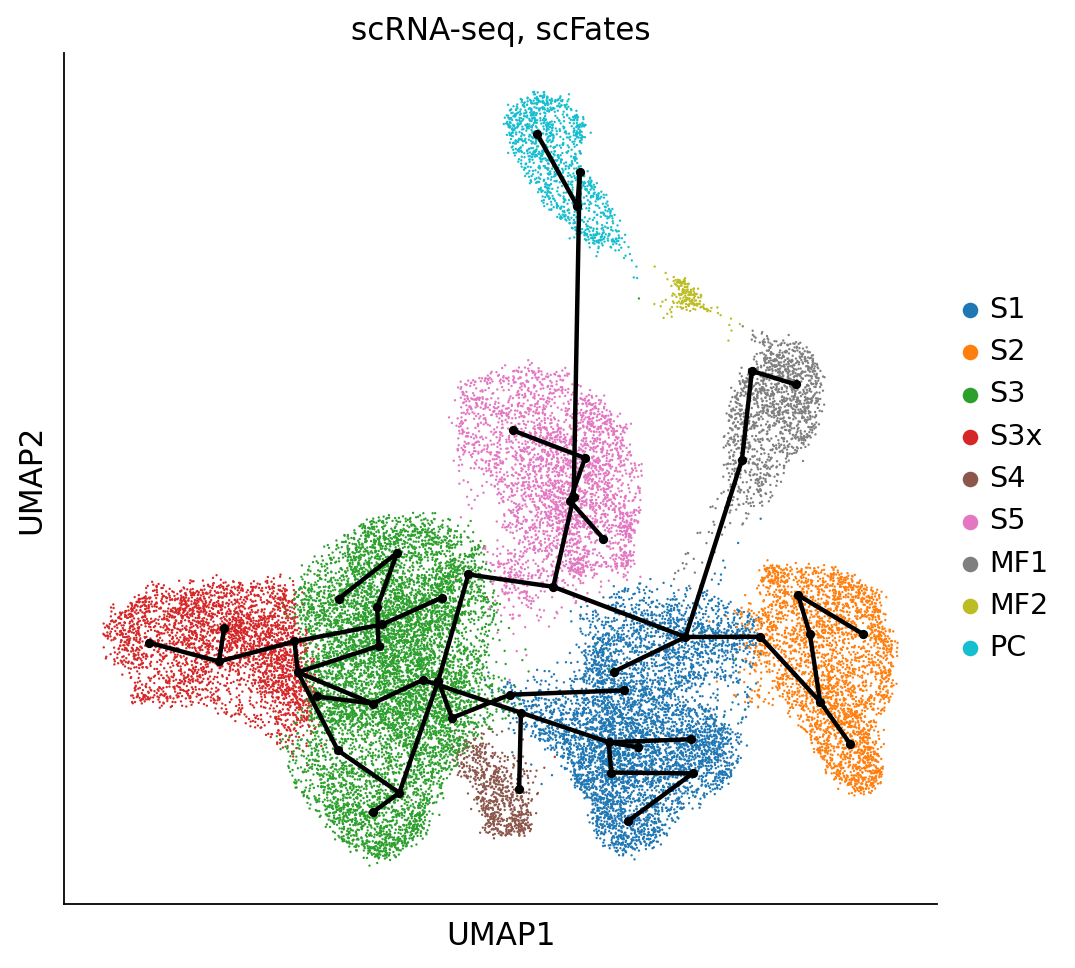

In [8]:
sc.set_figure_params(dpi_save=300, figsize=(7, 7.0))

scf.pl.graph(rna, color_cells="annot1", tips=False, forks=False, size_nodes=10, alpha_seg=1.0, basis="umap",
             title="scRNA-seq, scFates",
             save="_RNA_scFates_PCA_annot.pdf")

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


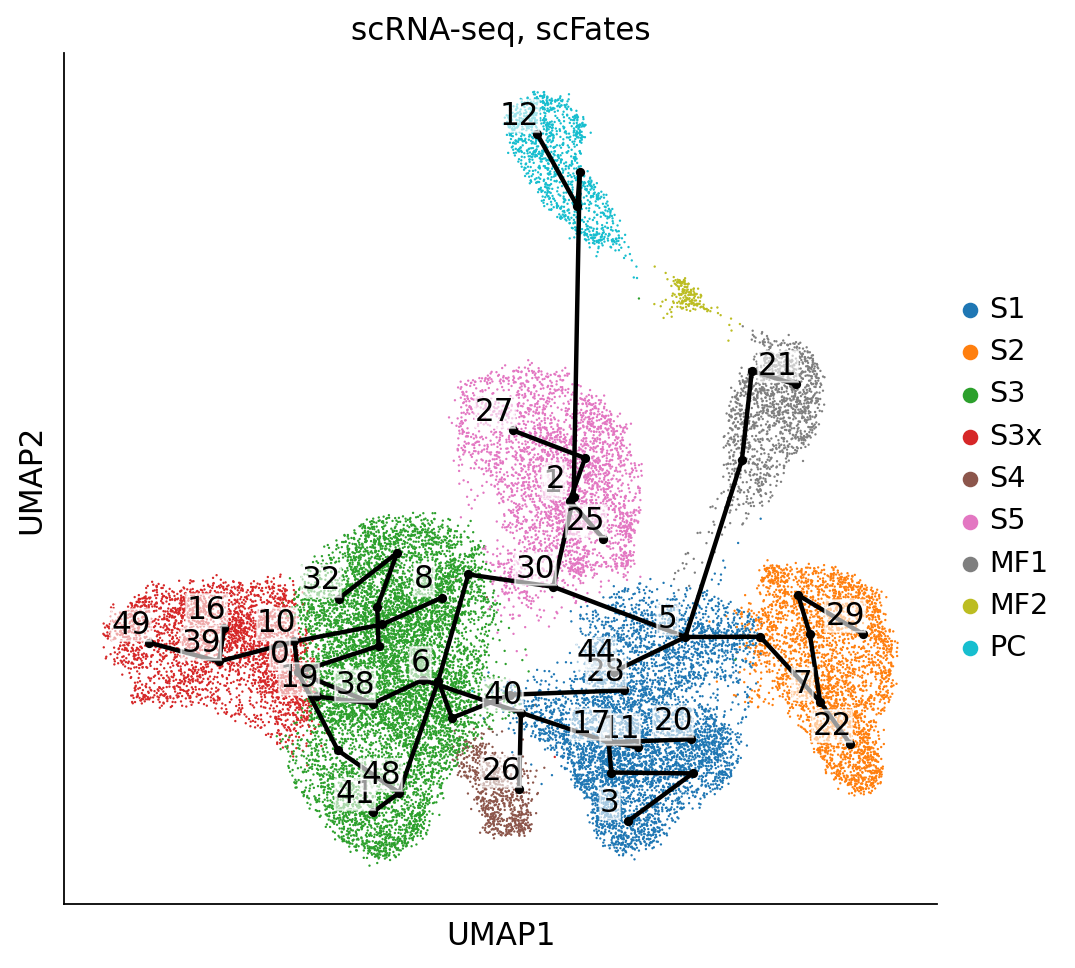

In [9]:
# Plot node numbers
scf.pl.graph(rna, color_cells="annot1", tips=True, size_nodes=10, alpha_seg=1.0, basis="umap",
             title="scRNA-seq, scFates")

In [10]:
# set root and calculate global pseudotime
scf.tl.root(rna, 49)  # CD34

node 49 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [11]:
#rna.uns['graph']

In [12]:
# Not sure why these fail
#scf.tl.pseudotime(rna, n_jobs=20, n_map=100, seed=42)
#scf.tl.pseudotime(rna, n_jobs=20, n_map=100, seed=42)
#scf.tl.pseudotime(rna, n_jobs=20, n_map=1, seed=42)

In [13]:
rna.obsm['X_pca'].shape

(26727, 30)

In [14]:
# print raw count matrix
print(rna.raw.X[1:20, 1:10])

  (12, 6)	1.1711452
  (13, 7)	1.4051104
  (15, 7)	1.3710405
  (15, 5)	1.3710405
  (16, 3)	2.124558
  (18, 6)	1.4681345


In [15]:
print(rna.X[1:20, 1:10])

  (12, 6)	2.308951
  (13, 7)	3.016047
  (15, 5)	6.841673
  (15, 7)	2.9429166
  (16, 3)	10.0
  (18, 6)	2.894475


In [16]:
#scf.tl.root(adata,163)

# palantir diffussion map

In [17]:
adata = rna.copy()

In [18]:
pca_projections = pd.DataFrame(adata.obsm["X_pca"], index=adata.obs_names)


In [19]:
# Run palantir
dm_res = palantir.utils.run_diffusion_maps(pca_projections, n_components=10)

#ms_data = palantir.utils.determine_multiscale_space(dm_res, n_eigs=4)
ms_data = palantir.utils.determine_multiscale_space(dm_res)


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
adata.obsm["X_palantir"] = ms_data.values

In [21]:
sc.pp.neighbors(adata, n_neighbors=30, use_rep="X_palantir")

In [22]:
sc.tl.umap(adata)

/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


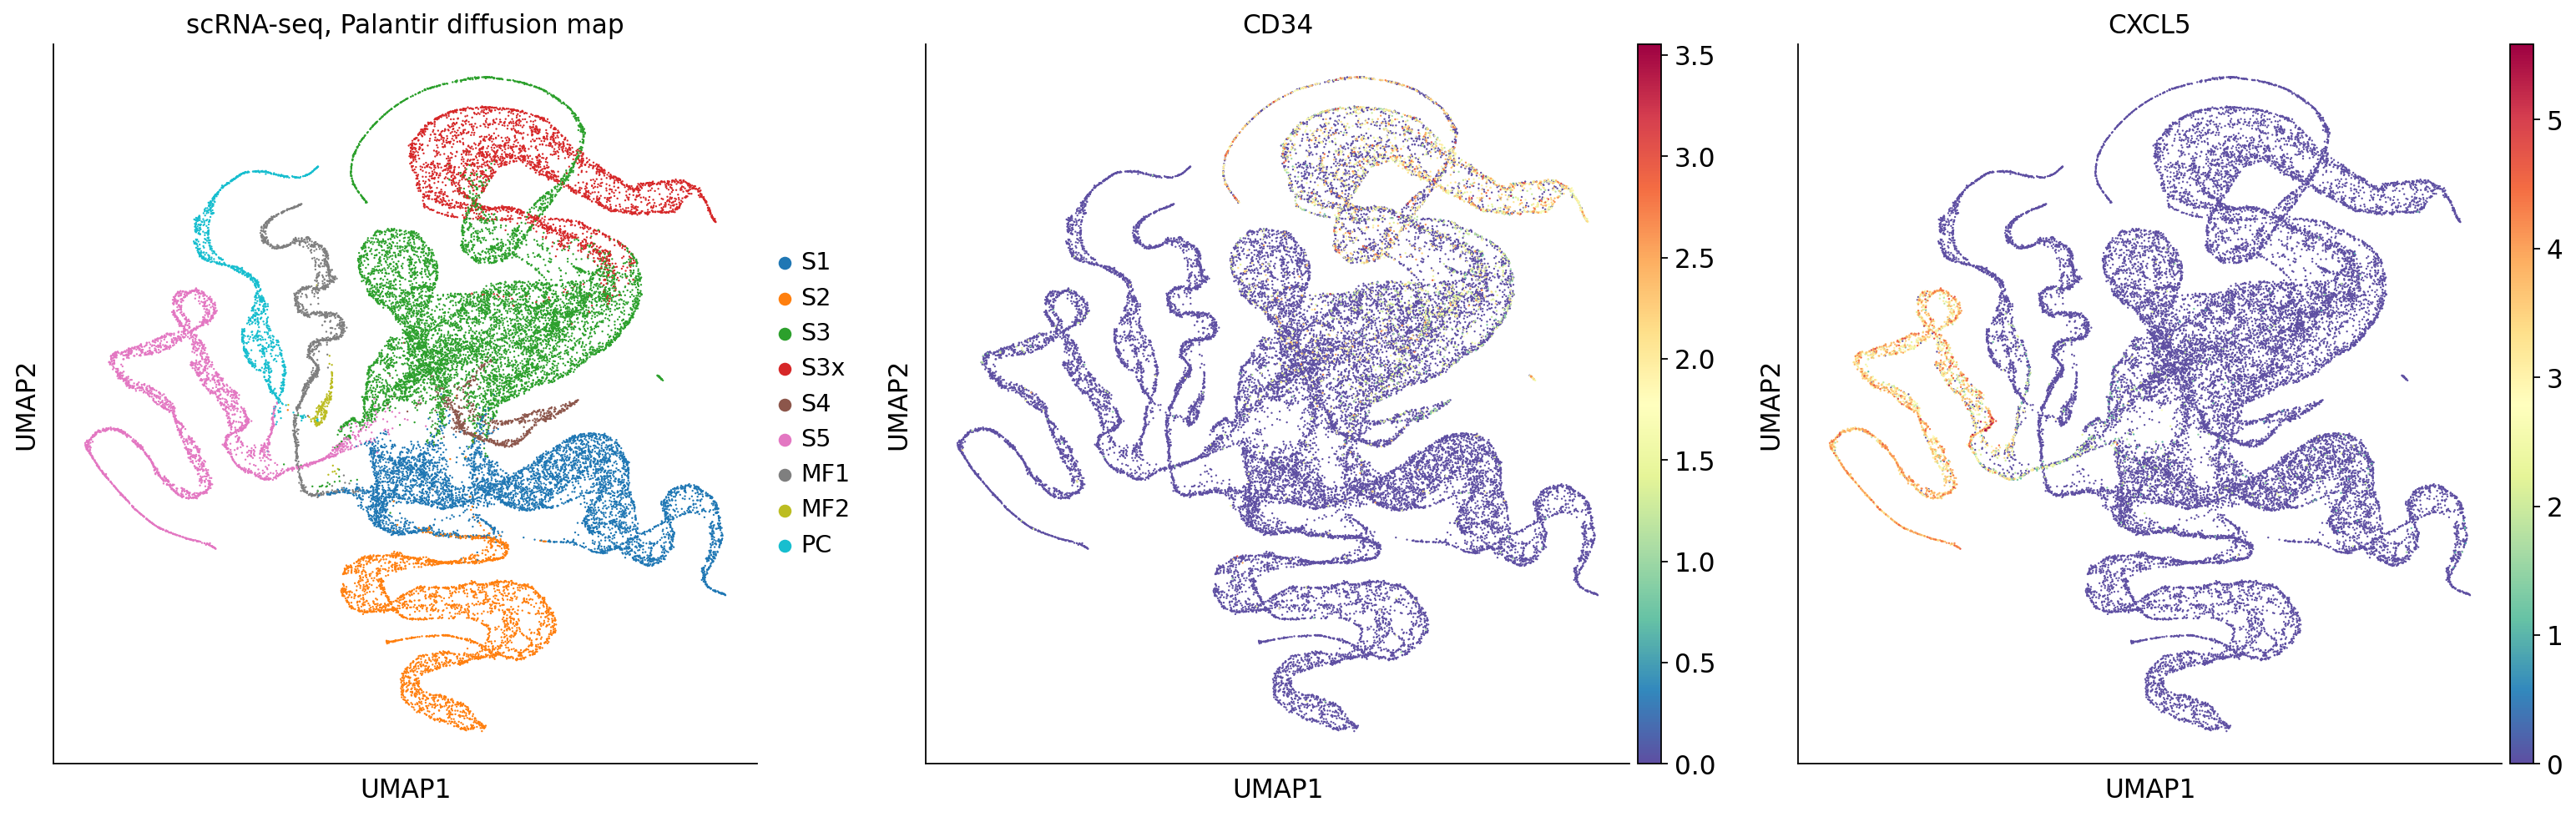

In [23]:
sc.pl.umap(adata, color=["annot1", "CD34", "CXCL5"], title="scRNA-seq, Palantir diffusion map", save="_RNA_Palantir_diffusion.pdf")

In [24]:
# palantir.plot.plot_diffusion_components(adata)
# plt.show()

In [25]:
#sc.pl.draw_graph(adata, color="CD34",color_map="RdBu_r")


In [26]:
scf.tl.tree(adata, method="ppt", Nodes=500, use_rep="palantir",
            device="cpu", seed=1, ppt_lambda=50, ppt_sigma=0.025, ppt_nsteps=200)

inferring a principal tree --> parameters used 
    500 principal points, sigma = 0.025, lambda = 50, metric = euclidean
    fitting:  32%|███▏      | 63/200 [00:53<01:55,  1.19it/s]
    converged
    more than 30 tips detected!
    finished (0:00:54) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


/home/jovyan/my-conda-envs/ni_env2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


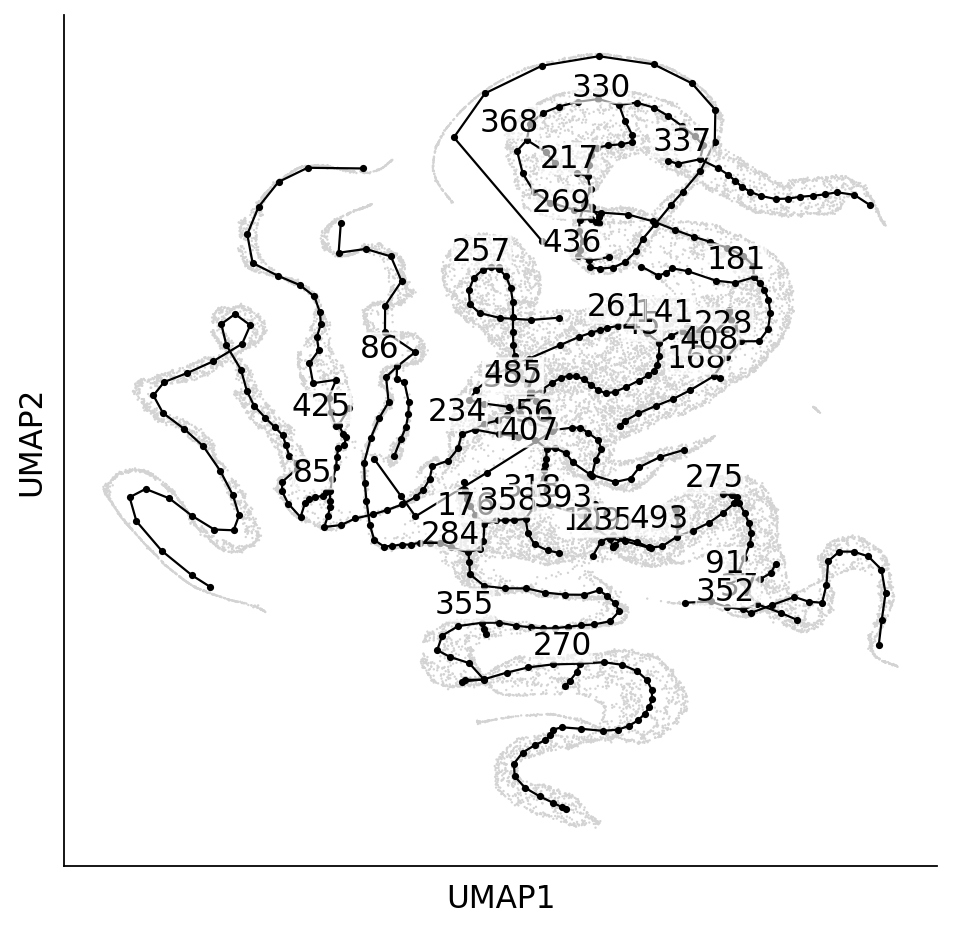

In [27]:
scf.pl.graph(adata, forks=True, tips=False, size_nodes=5, linewidth=1)

In [28]:
scf.tl.root(adata, 337)  # midpoint of CD34 cluster

node 337 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [29]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Estimate pseudo-time
scf.tl.pseudotime(adata, n_jobs=1, n_map=1, seed=42)  # weird warnings


projecting cells onto the principal graph
    finished (0:00:27) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


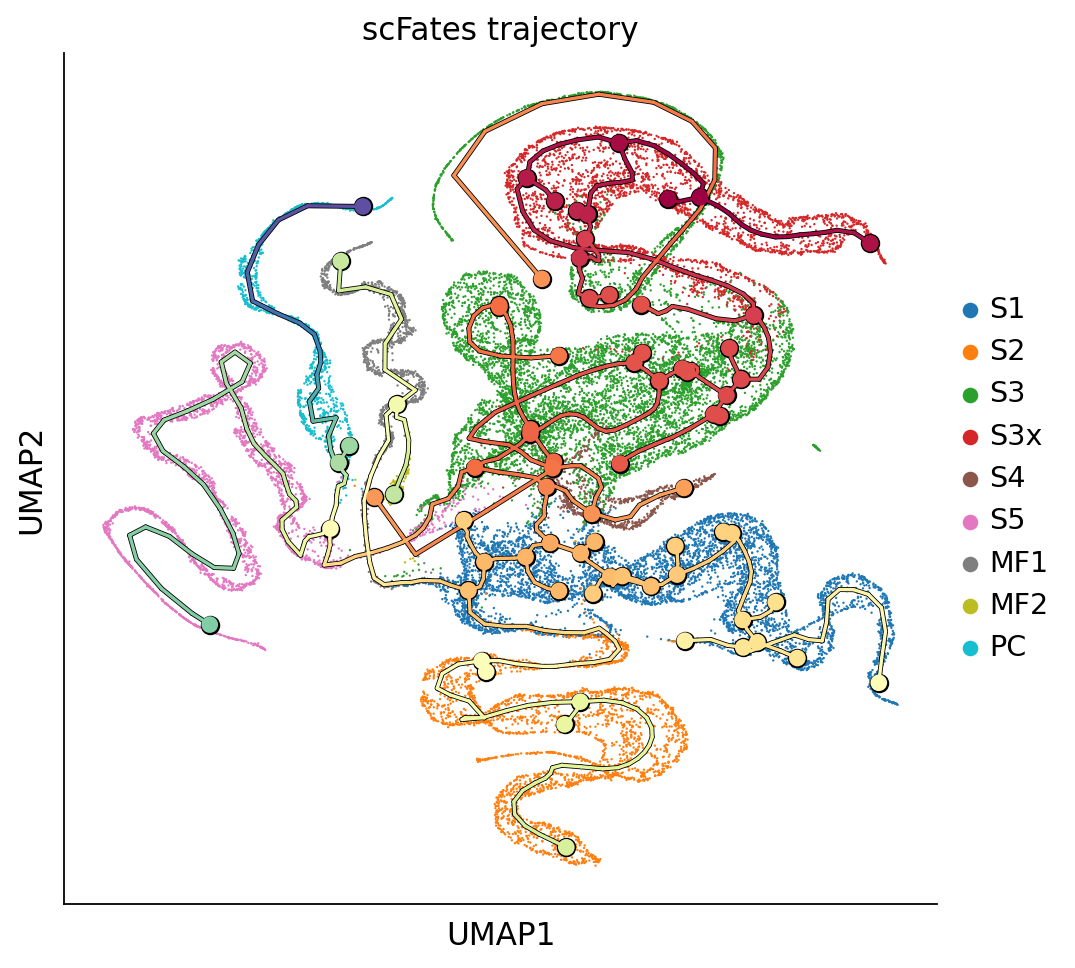

In [30]:

scf.pl.trajectory(adata, scale_path=0.3, color_cells="annot1", cmap_seg="Spectral", save="_RNA_Palantir_trajectory.pdf", title="scFates trajectory")

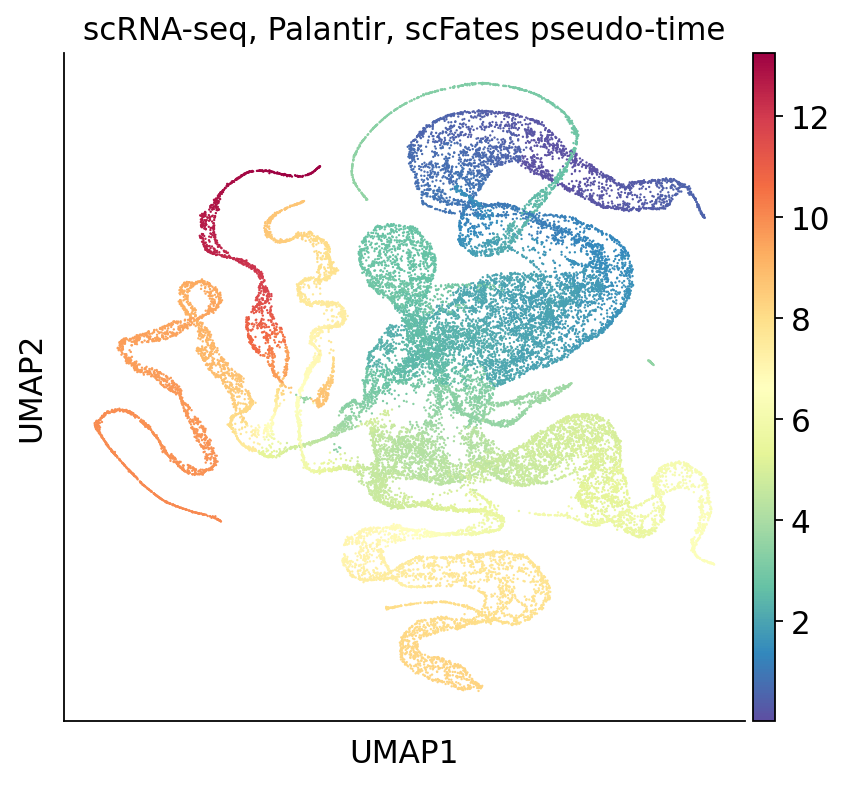

In [31]:
sc.set_figure_params(dpi_save=300, figsize=(6, 5.5))

sc.pl.umap(adata, color=["t"], title="scRNA-seq, Palantir, scFates pseudo-time",
           #save="_RNA_Palantir_diffusion.pdf"
           #color_map="Spectrum_r"

           save="_RNA_Palantir_scFates_pseudotime.pdf"
)

In [32]:
# Copy pseudo-time estimate to original AnnData object
rna.obs['t'] = adata.obs.t

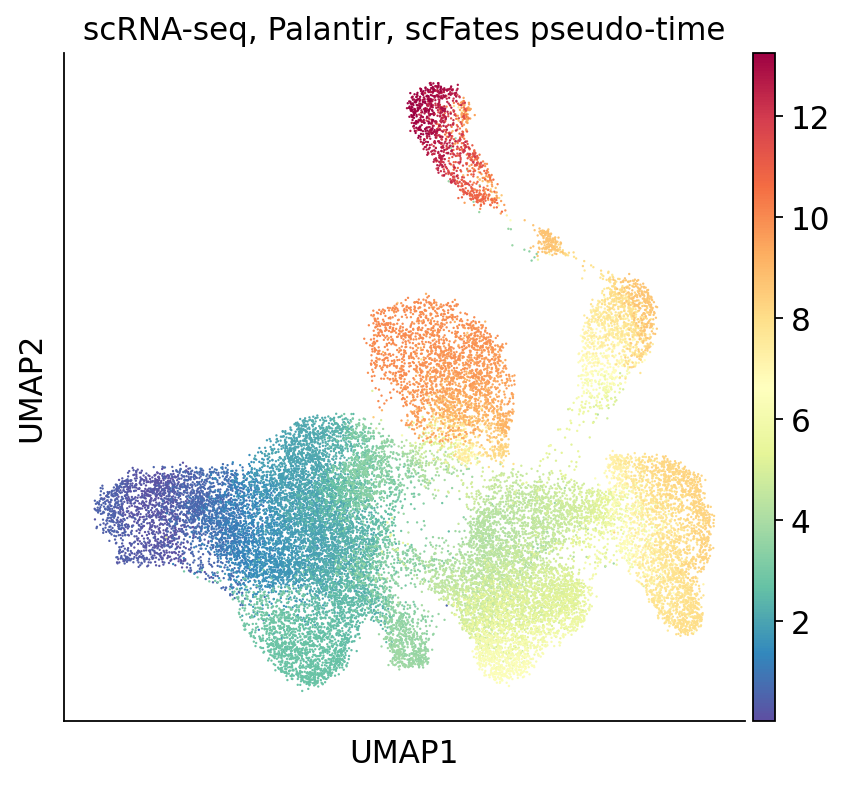

In [33]:
sc.pl.umap(rna, color=["t"],
           title="scRNA-seq, Palantir, scFates pseudo-time",
           #save="_RNA_Palantir_diffusion.pdf"
           #color_map="Spectrum_r"
           save="_RNA_Palantir_scFates_pseudotime_oriUMAP.pdf"
)

## Dendrogram visualizations

In [34]:
scf.tl.dendrogram(adata)

Generating dendrogram of tree
    segment : 100%|██████████| 70/70 [01:15<00:00,  1.07s/it]
    finished (0:01:15) --> added 
    .obsm['X_dendro'], new embedding generated.
    .uns['dendro_segments'] tree segments used for plotting.


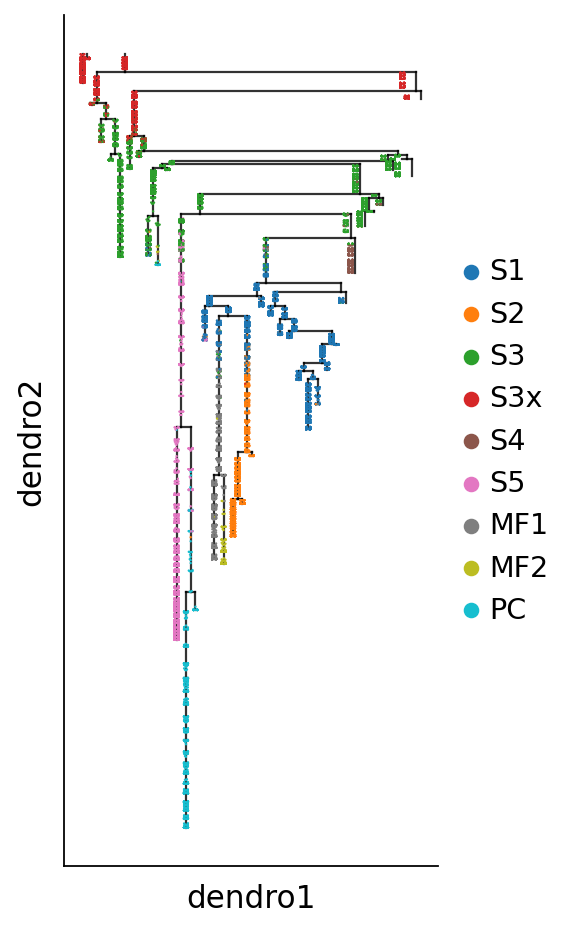

In [35]:
sc.set_figure_params(dpi_save=300, figsize=(3, 7))

scf.pl.dendrogram(adata, color="annot1", linewidth_seg=1, tree_behind=True, alpha_seg=0.8, title="", save="_RNA_scFates.pdf")


In [36]:
#adata

In [37]:
# scf.set_figure_pubready()

# scf.pl.single_trend(adata, "CXCL5", basis="dendro", wspace=-.25,
#                     #save="_E2.pdf"
# )

In [38]:
#adata.obs.seg

In [39]:
# Tree pseudotime association tests, per segment.
# Long runtime
#scf.tl.test_association(adata, n_jobs=6)  # memory intensive per job, ~6GB per job

In [40]:
#scf.tl.fit(adata, n_jobs=4)

In [41]:
# palantir.plot.plot_palantir_results(adata, s=3)
# plt.show()

In [42]:
# sc.set_figure_params(dpi_save=300, figsize=(7, 7))

# scf.pl.milestones(adata)

In [43]:
# draw Formilestonestlas2 embedding using 2 first PCs as initial positions
#adata.obsm["X_pca2d"]=adata.obsm["X_pca"][:,:2]
#sc.tl.draw_graph(adata, init_pos='X_pca2d')

In [44]:
#sc.pl.draw_graph(adata, color="CD34", color_map="RdBu_r")

# Tests of single trajectory approach

In [45]:

# On 
#scf.tl.curve(adata, Nodes=30, use_rep="X_umap", ndims_rep=2)

In [46]:
#scf.pl.graph(adata, basis="umap")